In [ ]:
##1. Random Sampling: Each of you will use a random sample of 10K instances drawn from the 61K instances in the secondary mushroom data. Briefly explain the random sampling code cell(s) in your submission notebook. [4 marks]
##2. Exploratory Data Analysis (EDA): Create appropriate visualisations to explore your dataset and summarise your findings about the data. Highlight your findings relevant to the model fitting stage (task 3 onwards). [10 marks]
##3. Model Shortlisting based on EDA: Based on your findings from the above EDA task, shortlist three classifiers from the classifiers you learnt in the lab classes. Explain your choice of classifiers in terms of your findings from the above EDA task. [5 marks]
##4. Model Fitting: Fit the chosen three classifiers to your sample of data, briefly explaining your choices and assumptions. [10 marks]
##5. Model Evaluation & model selection: Evaluate your three classifiers from the above task using the cross-validation method and explain the performance of your three classifiers. Explain how you use the cross-validation results to select the ‘winning’ classifier among the three. [15 marks]
##6. Final model Selection: In your lab classes, you learnt several classifiers, more than the three you selected in task 3 above. Now fit the remaining classifiers you learnt (excluding the three you already fitted in task 4) and evaluate all the new models fitted in this task using the cross- validation method. Explain how you use the cross-validation results from tasks 5 and 6 to select the final ‘winning’ classifier for your dataset. [15 marks]
##7. You have two ‘winning’ classifiers from tasks 5 and 6. Using the evaluation data from tasks 5 and 6 and your findings from the EDA in task 2, explain how helpful your EDA findings have been in improving the efficiency of the model fitting and selection process. [10 marks]
##8. Explain the top three lessons/insights you gained from tasks 1 to 6 in building classification models. [6 marks]

## all of my explanations will be in one big text file at the end of this notebook, this is to ensure i stayed within the word count and to ensure readability for the user.

In [ ]:
## task 1 

import pandas as pd
from sklearn.model_selection import train_test_split

primary = pd.read_csv("MushroomDataset/primary_data.csv", sep=";")
secondary = pd.read_csv("MushroomDataset/secondary_data.csv", sep=";")
sample.columns = sample.columns.str.strip()




print("Primary shape:", primary.shape)
print("Secondary shape:", secondary.shape)
df = secondary
print(df['class'].value_counts())

sample_simple = df.sample(n=10000, random_state=42,replace=False )
sample_stratified,_= train_test_split(df, train_size=10000, stratify=df['class'], random_state=42)

sample = sample_stratified
sample.to_csv('mushroom_sample_10k.csv', index=False)
print("sample shape: ", sample.shape)
print("sample class counts: ", sample['class'].value_counts(normalize=False))



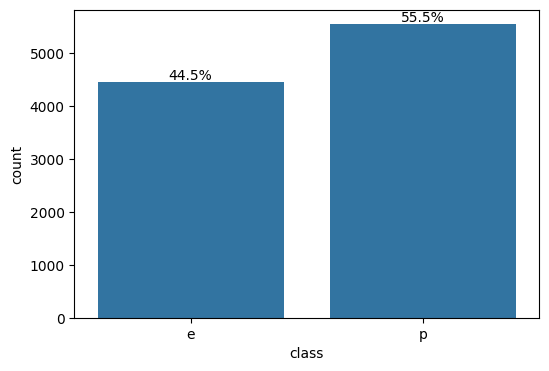

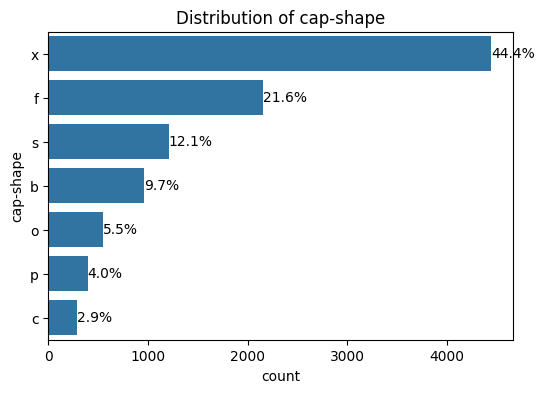

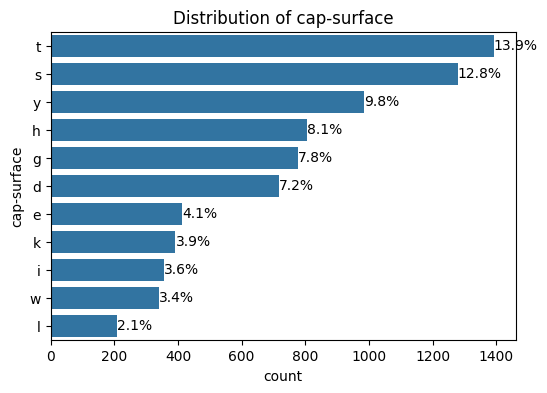

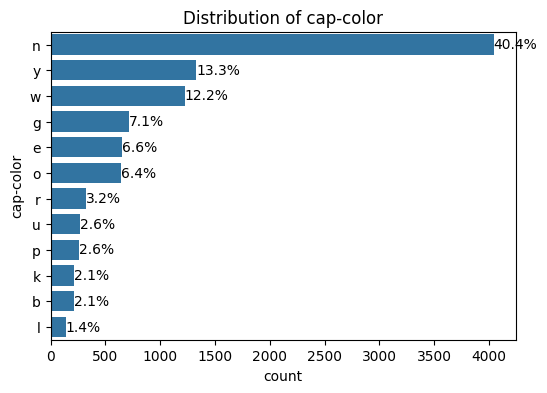

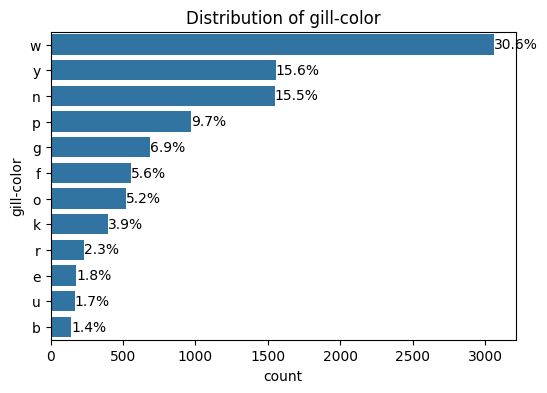

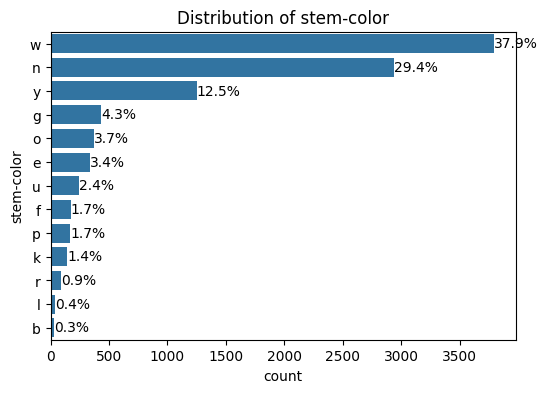

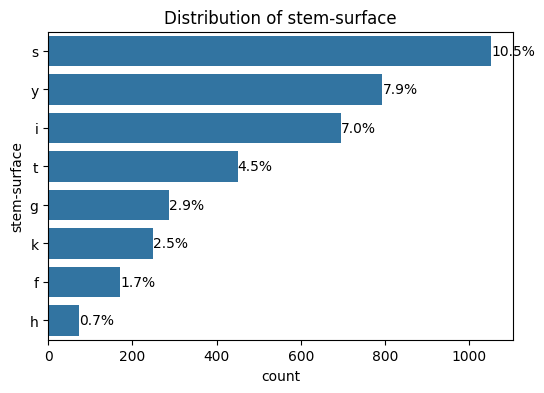

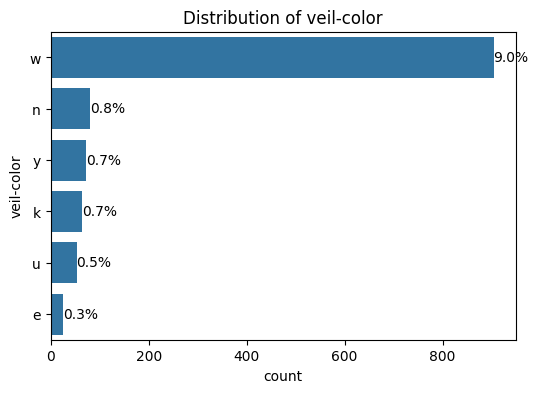

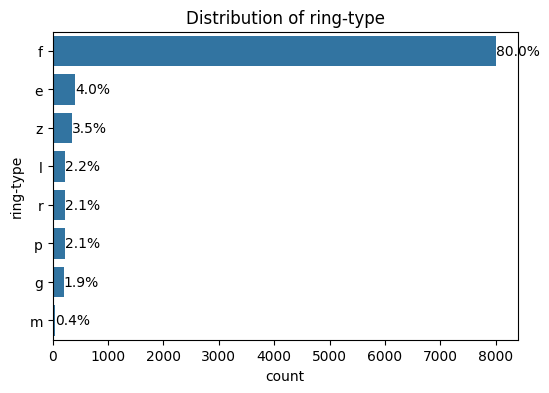

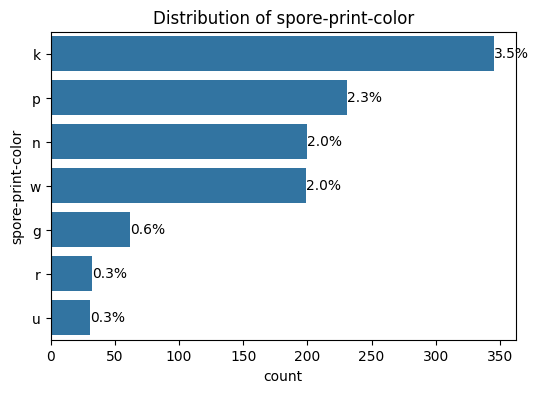

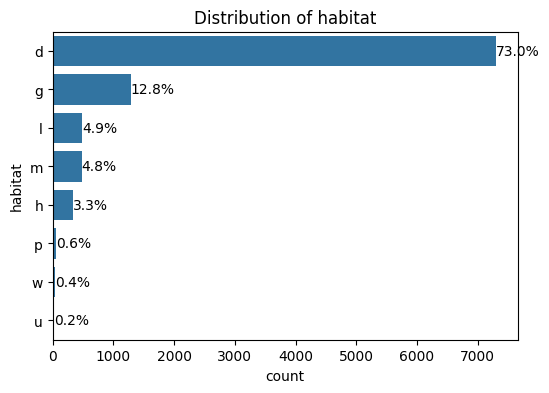

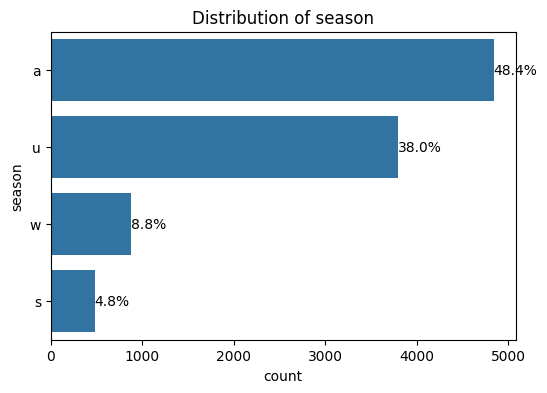

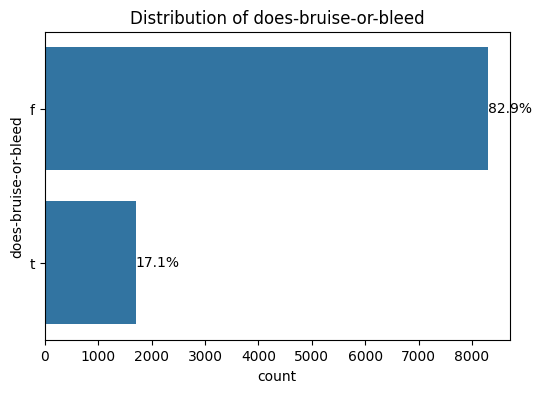

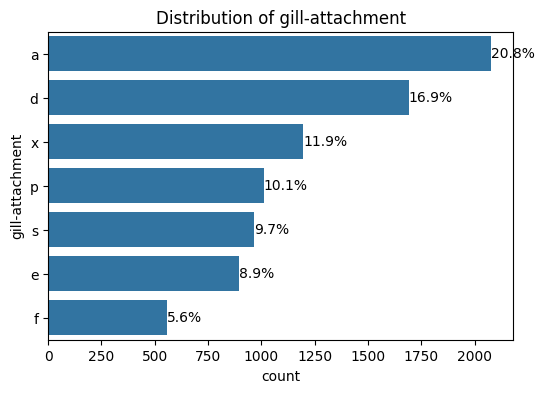

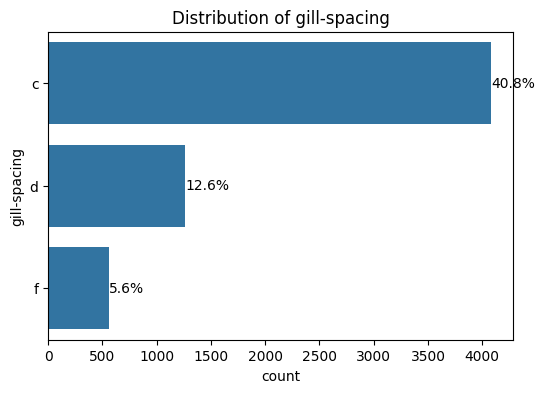

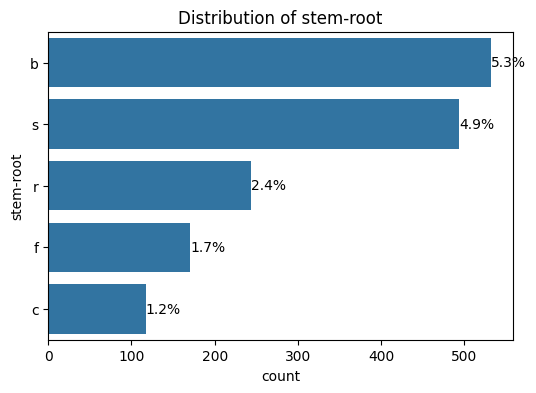

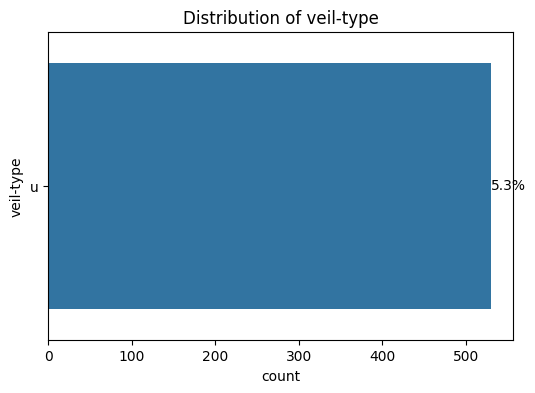

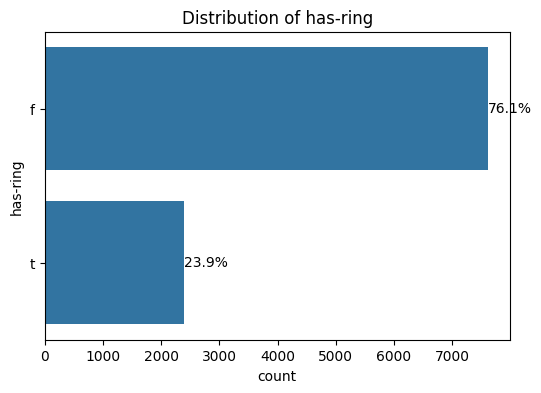

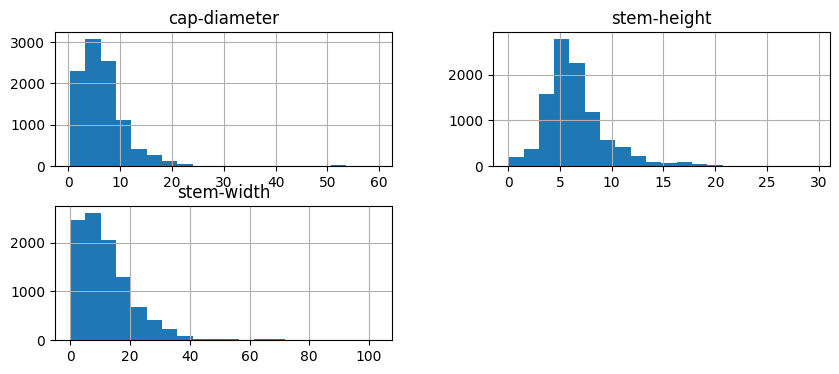

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

## class distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='class', data=sample)

total = len(sample)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

## categorical feature distributions
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(y=col, data=sample, order=sample[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    
    # Add percentages on top of bars for comparisons
    total = len(sample)
    for p in ax.patches:
        width = p.get_width()
        percentage = width / total * 100
        ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center')
    plt.show()

## numeric feature distributions
sample[numeric_cols].hist(bins=20, figsize=(10,4))
plt.show()


In [ ]:
##task 3

#Based on EDA we select 3 classifiers, randomFores, gradientBoosting and logicRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

shortlisted_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

print("Task 3: Shortlisted models:", list(shortlisted_models.keys()))

In [ ]:
##task 4 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Define categorical and numeric columns
numeric_cols = ['cap-diameter', 'stem-height', 'stem-width']
categorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'gill-color', 'stem-color', 'stem-surface','veil-color', 'ring-type', 'spore-print-color','habitat', 'season', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'stem-root', 'veil-type', 'has-ring']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)

    ]
)


model_pipelines= {}
for name, clf in shortlisted_models.items():
    pipe = Pipeline([('preprocess', preprocessor), ('classifier', clf)])
    pipe.fit(sample.drop('class', axis=1), sample['class'])
    model_pipelines[name] = pipe

print("Task 4: Models fitted successfully.")


In [ ]:
## task 5
from sklearn.model_selection import cross_val_score

cv_results = {}
for name, model in model_pipelines.items():
    scores = cross_val_score(model, sample.drop('class', axis=1), sample['class'], 
                             cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")
    
# Select the winning model
winning_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\nTask 5: Winning model based on CV = {winning_model_name}")

In [ ]:
##task 6

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score

dense_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

additional_models = {
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}

additional_pipelines = {}
additional_cv_results = {}

for name, clf in additional_models.items():
    pipe = Pipeline([('preprocess', dense_preprocessor), ('classifier', clf)])
    pipe.fit(sample.drop('class', axis=1), sample['class'])
    additional_pipelines[name] = pipe
    
    scores = cross_val_score(pipe, sample.drop('class', axis=1), sample['class'], 
                             cv=5, scoring='accuracy')
    additional_cv_results[name] = scores
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

all_results = {**cv_results, **additional_cv_results}
final_winning_model_name = max(all_results, key=lambda k: all_results[k].mean())
print(f"\nTask 6: Final winning model = {final_winning_model_name}")
